# Data Exploration & Preparation

**Environment Setup**

In [1]:
#Loading key libraries for later analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
pd.set_option('max_colwidth', 1000)
!pip install spacy
!pip install xgboost
import functions


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.       

In [2]:
#Read in bank transactions
loc_rules = pd.read_csv(r'local_rules_3.0.csv',low_memory=False,encoding='latin1')
global_rule = pd.read_csv(r'Global Rules.csv',low_memory=False,encoding='latin1')
data = pd.read_csv(r'bank trans v4.2.csv',low_memory=False,encoding='latin1')
conflicting_trans = pd.read_csv(r'conflicts.csv',low_memory=False)

In [8]:
import os
os.getcwd()

'/project'

## 1. Data Understanding

In [3]:
#make copy of the dataset
df_data = data.copy()

In [35]:
#def conflict_correct(df,des,column,a):
   # for x in des:
   #     df.loc[df['description']==x,column] = a
        
#def rule(df,i,y):
   # df['global'+str(i)] = [i if x == True else 0 for x in df.description.str.contains(y, regex= True, na=False)]
    
#def conf_des_gen(df,column,category):
  #  return df.description[df[column]==category].to_list()    

def rule_gen(i):
    rule_i = global_rule[global_rule['standard_transaction_type_id']==i]
    rule_i_str = "|".join(rule_i.regex_pattern)
    return 'r' + rule_i_str

### 1.1 Local Rules

In [4]:
functions.explore(loc_rules)

The shape of the dataset is:(1749, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            1749 non-null   int64 
 1   created_at                    1749 non-null   object
 2   updated_at                    1749 non-null   object
 3   updated_by                    1749 non-null   object
 4   transaction_description       1749 non-null   object
 5   crd_id                        1749 non-null   object
 6   accounting_entry              1749 non-null   object
 7   standard_transaction_type_id  1749 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 109.4+ KB


The number of null value of the dataset is:
id                              0
created_at                      0
updated_at                      0
updated_by                      0
transaction_description         0
crd_id

,id,created_at,updated_at,updated_by,transaction_description,crd_id,accounting_entry,standard_transaction_type_id
0,4,2019-10-31 08:40:45.505165,2019-10-31 08:40:45.505187,indy.johal@growthstreet.co.uk,PAYPAL PAYMENT,3f0b26fd-a097-4917-969d-0210f472be56,DR,11
1,13,2019-10-31 08:43:08.28719,2019-10-31 08:43:08.287215,indy.johal@growthstreet.co.uk,AMERICAN EXPRESS,3f0b26fd-a097-4917-969d-0210f472be56,DR,11
2,21,2019-10-31 08:43:41.778961,2019-10-31 08:43:41.778982,indy.johal@growthstreet.co.uk,WESTERN UNION 13255LC023NK,3f0b26fd-a097-4917-969d-0210f472be56,DR,11
3,29,2019-10-31 08:44:27.478755,2019-10-31 08:44:27.478786,indy.johal@growthstreet.co.uk,SUE PETTIT RBH161098XQFVR9C EUR RATE 1.13057090000001.13057093,3f0b26fd-a097-4917-969d-0210f472be56,DR,11
4,37,2019-10-31 08:46:48.303633,2019-10-31 08:46:48.303662,indy.johal@growthstreet.co.uk,ADVICE CONFIRMS RBH15109ALQ9XDC0 UPSTREAM MOBILE CO,3f0b26fd-a097-4917-969d-0210f472be56,CR,6


**Transaction Types in Local Rules**

1     438
2      32
3     245
4       5
5      58
6     113
7      51
8      71
9      40
10    286
11     78
12     26
13    285
14      7
15      4
16     10
Name: standard_transaction_type_id, dtype: int64


Text(0.5, 1.0, 'Percentage of Each Category in Local Rules')

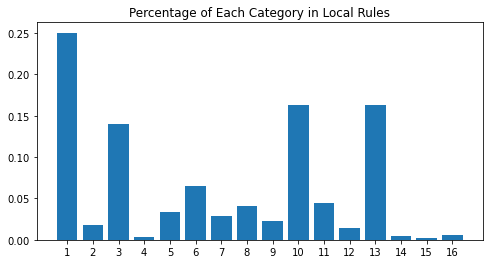

In [5]:
#count transactions by types
a = loc_rules['standard_transaction_type_id'].value_counts().sort_index()
print(a)
X = [(x/len(loc_rules)) for x in a ]
plt.figure(figsize=(8,4))
plt.bar(range(1,17), X)
plt.xticks(range(1,17), list(range(1,17)))
plt.title("Percentage of Each Category in Local Rules")

**Creation and Update date**

In [8]:
#turn transaction date to datetime variable for further analysis
functions.date_time_split(loc_rules,'created_at')
functions.date_time_split(loc_rules,'updated_at')

#count the difference in creation and updated date
loc_rules['bool'] = loc_rules.apply(lambda x : functions.check_equal(x['created_at_date'],x['updated_at_date']),axis = 1)
print(loc_rules['bool'].value_counts())
loc_rules=functions.drop_column(loc_rules,'bool')

1                    1738
9 days, 0:00:00         4
18 days, 0:00:00        2
66 days, 0:00:00        1
27 days, 0:00:00        1
181 days, 0:00:00       1
35 days, 0:00:00        1
26 days, 0:00:00        1
Name: bool, dtype: int64


<Figure size 1440x432 with 0 Axes>

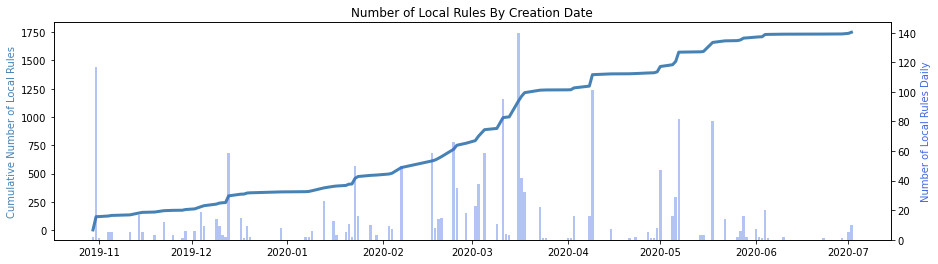

In [9]:
#Plot local rules creation process
#Set figure size
plt.figure(figsize=(20,6))

#Define variables
day_count=loc_rules['standard_transaction_type_id'].groupby(loc_rules['created_at_date']).count()
day_count = day_count.to_frame().reset_index()
y = day_count['standard_transaction_type_id'].cumsum()

fig, time_series_monthly_1 = plt.subplots(figsize=(15,4))
time_series_monthly_2 = time_series_monthly_1.twinx()

#Plot line graphs
time_series_monthly_1.plot(day_count['created_at_date'], y, color='steelblue',linewidth=3)
time_series_monthly_2.bar(day_count['created_at_date'], day_count['standard_transaction_type_id'], color='royalblue', alpha = 0.4,label = 'Number of Local Rules Daily')

#Format plot
time_series_monthly_1.set_ylabel('Cumulative Number of Local Rules', color='steelblue')
time_series_monthly_2.set_ylabel('Number of Local Rules Daily', color='royalblue')
plt.title("Number of Local Rules By Creation Date")
plt.xlabel("Month")
plt.savefig(r'creation date.png',bbox_inches='tight')

In [16]:
#average number of local rules created per day
day_count['standard_transaction_type_id'].mean()

18.21875

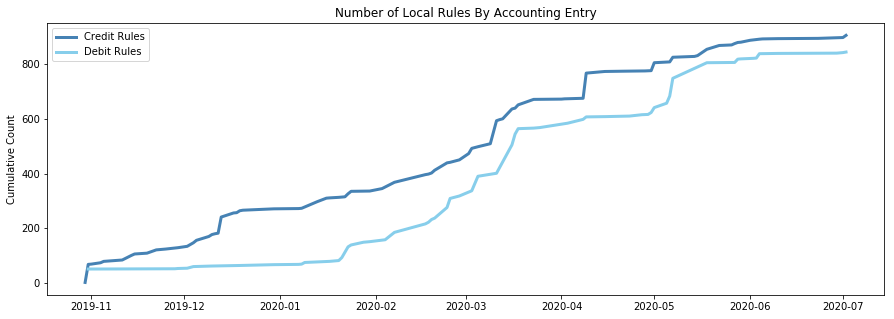

In [17]:
#Set figure size
plt.figure(figsize=(15,5))

#Define variables
a = loc_rules.groupby(['created_at_date','accounting_entry'])['standard_transaction_type_id'].count()
a=pd.DataFrame(a).reset_index()
a=a.rename(columns={"standard_transaction_type_id": 'transaction counts'})
cr = a[a['accounting_entry']=='CR']
dr= a[a['accounting_entry']=='DR']

#Plot line graphs
plt.plot(cr['created_at_date'], cr['transaction counts'].cumsum(), label= "Credit Rules",color='steelblue',linewidth=3)
plt.plot(dr['created_at_date'], dr['transaction counts'].cumsum(), label="Debit Rules",color='skyblue',linewidth=3)

#Format plot
plt.ylabel("Cumulative Count")
plt.title("Number of Local Rules By Accounting Entry")
plt.legend()
plt.savefig(r'accounting.png',bbox_inches='tight')

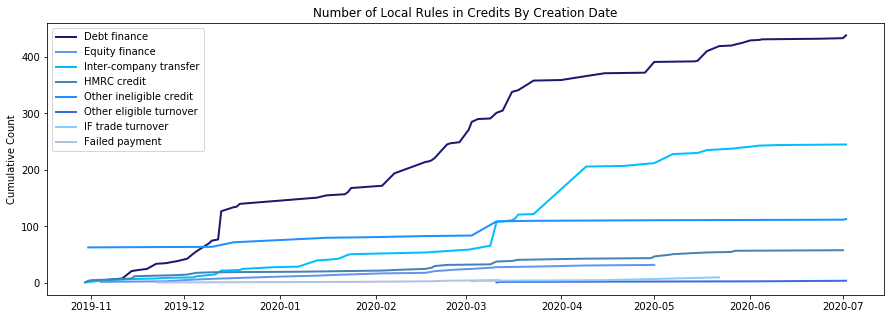

In [18]:
#Set figure size
plt.figure(figsize=(15,5))

#Define variables
b = loc_rules[loc_rules['accounting_entry']=='CR']
b_count= b.groupby(['created_at_date','standard_transaction_type_id'])['accounting_entry'].count()
b_count = pd.DataFrame(b_count).reset_index()
b_count=b_count.rename(columns={"accounting_entry": 'transaction counts'})
cr1= b_count[b_count['standard_transaction_type_id']==1]
cr2= b_count[b_count['standard_transaction_type_id']==2]
cr3= b_count[b_count['standard_transaction_type_id']==3]
cr4= b_count[b_count['standard_transaction_type_id']==4]
cr5= b_count[b_count['standard_transaction_type_id']==5]
cr6= b_count[b_count['standard_transaction_type_id']==6]
cr15= b_count[b_count['standard_transaction_type_id']==15]
cr16= b_count[b_count['standard_transaction_type_id']==16]

#Plot line graphs
plt.plot(cr1['created_at_date'], cr1['transaction counts'].cumsum(), label= "Debt finance",color='midnightblue',linewidth=2)
plt.plot(cr2['created_at_date'], cr2['transaction counts'].cumsum(), label= "Equity finance",color='cornflowerblue',linewidth=2)
plt.plot(cr3['created_at_date'], cr3['transaction counts'].cumsum(), label= "Inter-company transfer",color='deepskyblue',linewidth=2)
plt.plot(cr5['created_at_date'], cr5['transaction counts'].cumsum(), label= "HMRC credit",color='steelblue',linewidth=2)
plt.plot(cr6['created_at_date'], cr6['transaction counts'].cumsum(), label= "Other ineligible credit",color='dodgerblue',linewidth=2)
plt.plot(cr15['created_at_date'], cr15['transaction counts'].cumsum(), label= "Other eligible turnover",color='royalblue',linewidth=2)
plt.plot(cr16['created_at_date'], cr16['transaction counts'].cumsum(), label= "IF trade turnover",color='lightskyblue',linewidth=2)
plt.plot(cr4['created_at_date'], cr4['transaction counts'].cumsum(), label= "Failed payment",color='lightsteelblue',linewidth=2)

#Format plot
plt.ylabel("Cumulative Count")
plt.title("Number of Local Rules in Credits By Creation Date")
plt.legend()
plt.savefig(r'credite sub.png',bbox_inches='tight')

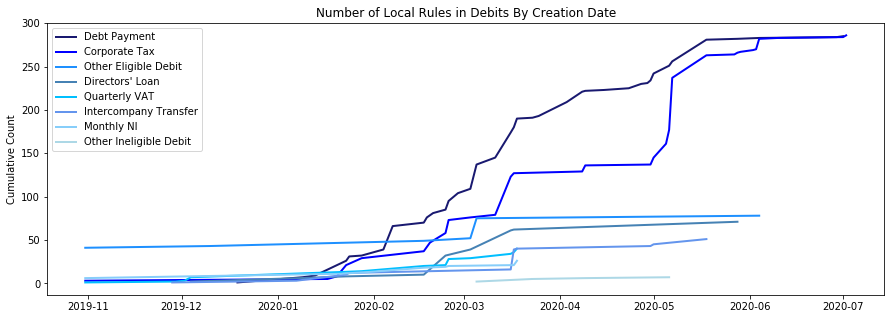

In [19]:
#Set figure size
plt.figure(figsize=(15,5))

#Define variables
b = loc_rules[loc_rules['accounting_entry']=='DR']
b_count= b.groupby(['created_at_date','standard_transaction_type_id'])['accounting_entry'].count()
b_count = pd.DataFrame(b_count).reset_index()
b_count=b_count.rename(columns={"accounting_entry": 'transaction counts'})
dr7= b_count[b_count['standard_transaction_type_id']==7]
dr8= b_count[b_count['standard_transaction_type_id']==8]
dr9= b_count[b_count['standard_transaction_type_id']==9]
dr10= b_count[b_count['standard_transaction_type_id']==10]
dr11= b_count[b_count['standard_transaction_type_id']==11]
dr12= b_count[b_count['standard_transaction_type_id']==12]
dr13= b_count[b_count['standard_transaction_type_id']==13]
dr14= b_count[b_count['standard_transaction_type_id']==14]

#Plot line graphs
plt.plot(dr13['created_at_date'],dr13['transaction counts'].cumsum(), label= "Debt Payment",color='midnightblue',linewidth=2)
plt.plot(dr10['created_at_date'], dr10['transaction counts'].cumsum(), label= "Corporate Tax",color='blue',linewidth=2)
plt.plot(dr11['created_at_date'], dr11['transaction counts'].cumsum(), label= "Other Eligible Debit",color='dodgerblue',linewidth=2)
plt.plot(dr8['created_at_date'], dr8['transaction counts'].cumsum(), label= "Directors' Loan",color='steelblue',linewidth=2)
plt.plot(dr9['created_at_date'], dr9['transaction counts'].cumsum(), label= "Quarterly VAT",color='deepskyblue',linewidth=2)
plt.plot(dr7['created_at_date'], dr7['transaction counts'].cumsum(), label= "Intercompany Transfer",color='cornflowerblue',linewidth=2)
plt.plot(dr12['created_at_date'], dr12['transaction counts'].cumsum(), label= "Monthly NI",color='lightskyblue',linewidth=2)
plt.plot(dr14['created_at_date'],dr14['transaction counts'].cumsum(), label= "Other Ineligible Debit",color='lightblue',linewidth=2)

#Format plot
plt.ylabel("Cumulative Count")
plt.title("Number of Local Rules in Debits By Creation Date")
plt.legend()
plt.savefig(r'debit sub.png',bbox_inches='tight')

### 1.2 Global Rules

In [20]:
functions.explore(global_rule)

The shape of the dataset is:(111, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
id                              111 non-null int64
created_at                      111 non-null object
updated_at                      111 non-null object
updated_by                      111 non-null object
transaction_field               111 non-null object
description                     111 non-null object
regex_pattern                   111 non-null object
standard_transaction_type_id    111 non-null int64
regex_flags                     111 non-null object
dtypes: int64(2), object(7)
memory usage: 7.9+ KB


The number of null value of the dataset is:
id                              0
created_at                      0
updated_at                      0
updated_by                      0
transaction_field               0
description                     0
regex_pattern                   0
standard_transaction_type_id    0
regex_flags            

,id,created_at,updated_at,updated_by,transaction_field,description,regex_pattern,standard_transaction_type_id,regex_flags
0,11,2019-10-30 16:17:58.030266,2019-11-14 11:44:43.478688,greg.hinch@growthstreet.co.uk,DE,financial at middle or end,.+\bfinancial\b,1,i
1,104,2020-01-17 11:27:47.47982,2020-01-17 11:27:47.479845,greg.hinch@growthstreet.co.uk,DE,ltsb comm,\bltsb comm(e|er|erc|erci|ercia|ercial|)\b,13,i
2,25,2019-10-30 16:28:42.07882,2019-11-14 11:31:47.456346,greg.hinch@growthstreet.co.uk,DE,federal cap,\bfederal cap(i|it|ita|ital|)\b,1,i
3,107,2020-01-17 11:27:47.509327,2020-01-17 11:27:47.509361,greg.hinch@growthstreet.co.uk,DE,photolease,\bphotolease\b,13,i
4,15,2019-10-30 16:17:58.124517,2019-11-14 11:44:43.914375,greg.hinch@growthstreet.co.uk,DE,joint account at middle,.+\bjoint account\b.+,3,i


1     51
3      4
4      2
5      2
7      4
9      1
10     1
13    46
Name: standard_transaction_type_id, dtype: int64


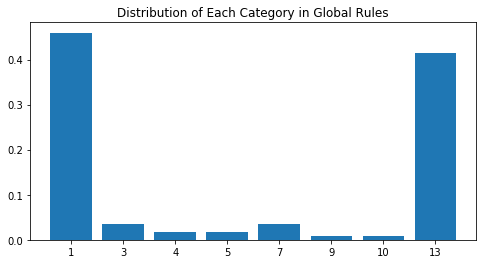

In [21]:
#count distribution of categories in global rules
a = global_rule['standard_transaction_type_id'].value_counts().sort_index()
print(a)
X = [(x/len(global_rule)) for x in a ]
plt.figure(figsize=(8,4))
plt.bar(range(1,9), X)
plt.xticks(range(1,9), [1,3,4,5,7,9,10,13])
plt.title("Distribution of Each Category in Global Rules")
plt.savefig(r'categoriy global.png',bbox_inches='tight')

In [11]:
#turn creation and updated time to datetime variables
functions.date_time_split(global_rule,'created_at')
functions.date_time_split(global_rule,'updated_at')

#investigate difference between creation and updated date
global_rule['bool'] = loc_rules.apply(lambda x : functions.check_equal(x['created_at_date'],x['updated_at_date']),axis = 1)
print(global_rule['bool'].value_counts())
global_rule=functions.drop_column(global_rule,'bool')

1                   109
26 days, 0:00:00      1
9 days, 0:00:00       1
Name: bool, dtype: int64


In [23]:
#check any conflicting rules assigning same description to different classes
a = global_rule[(global_rule['standard_transaction_type_id']==1) | (global_rule['standard_transaction_type_id']==5)| (global_rule['standard_transaction_type_id']==3)|(global_rule['standard_transaction_type_id']==4)].index

In [24]:
#change credit rules to its actual accounting entry of the associated categroy, as all rules were marked as debits which is incorrect
for index in a:
    global_rule.loc[index,'transaction_field'] = 'CR'

### 1.3 Bank Transactions

In [12]:
functions.explore(data)

The shape of the dataset is:(120799, 13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120799 entries, 0 to 120798
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              120799 non-null  object 
 1   amount            120799 non-null  float64
 2   balance           120799 non-null  float64
 3   date              120799 non-null  object 
 4   transactiontype   120799 non-null  object 
 5   description       120689 non-null  object 
 6   platform_bank     79160 non-null   object 
 7   lastsync_bank     112167 non-null  object 
 8   status_bank       120799 non-null  object 
 9   business_id       120799 non-null  int64  
 10  bankaccount_name  120799 non-null  object 
 11  crd_id            120799 non-null  object 
 12  codat_id          120799 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 12.0+ MB


The number of null value of the dataset is:
name            

,name,amount,balance,date,transactiontype,description,platform_bank,lastsync_bank,status_bank,business_id,bankaccount_name,crd_id,codat_id
0,15GIFTS LTD,-8.32,174882.67,2019-07-02 00:00:00,Payment,INT'L 0049276096 ADOBE PHOTOGPHY PADOBE.LY/BILL,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a
1,15GIFTS LTD,1.04,175001.90,2019-07-02 00:00:00,Credit,ASDA GROCERIES ONLINTERNET,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a
2,15GIFTS LTD,-432.00,175000.86,2019-07-02 00:00:00,Payment,J.WEEKS CLEANERS INV.01/15GIFTS,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a
3,15GIFTS LTD,-458.52,174424.15,2019-07-02 00:00:00,Payment,INT'L 0049276097 GOOGLE *GSUITE_15gCC@GOOGLE.COM,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a
4,15GIFTS LTD,-77.40,175432.86,2019-07-02 00:00:00,DirectDebit,PENINSULA BUSINESS,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a


In [30]:
#check composition of platform_bank
data['platform_bank'].value_counts()

Lloyds Bank               27346
HSBC                      10911
TrueLayer Open Banking    10717
RBS                        6536
NatWest                    5225
Santander                  4272
Starling Bank              3910
Barclaycard                3884
TrueLayer                  3315
Barclays                   3044
Name: platform_bank, dtype: int64

In [31]:
#checking the range and features of numerical features 
data.describe()

,amount,balance,business_id
count,1.207990e+05,1.207990e+05,120799.000000
mean,5.612011e+00,5.742375e+04,4813.447769
std,1.978037e+04,1.244890e+05,1111.378243
min,-9.200000e+05,-7.489588e+05,376.000000
25%,-7.276700e+02,0.000000e+00,4827.000000
50%,-1.200000e+02,2.129271e+04,5032.000000
75%,1.000000e+01,6.931417e+04,5193.000000
max,1.279800e+06,1.347977e+06,5794.000000


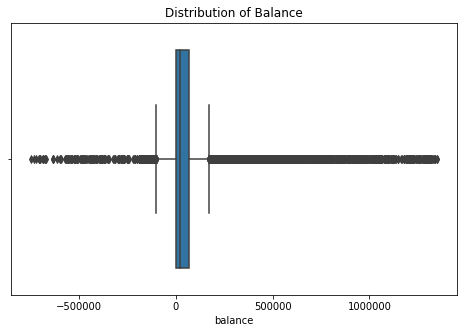

In [32]:
#plot balance in the box plot to show numerical features
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
age_box=sns.boxplot(x="balance",data=data)
age_box.set_title('Distribution of Balance')
age_box.figure.savefig("balance.png",bbox_inches='tight')

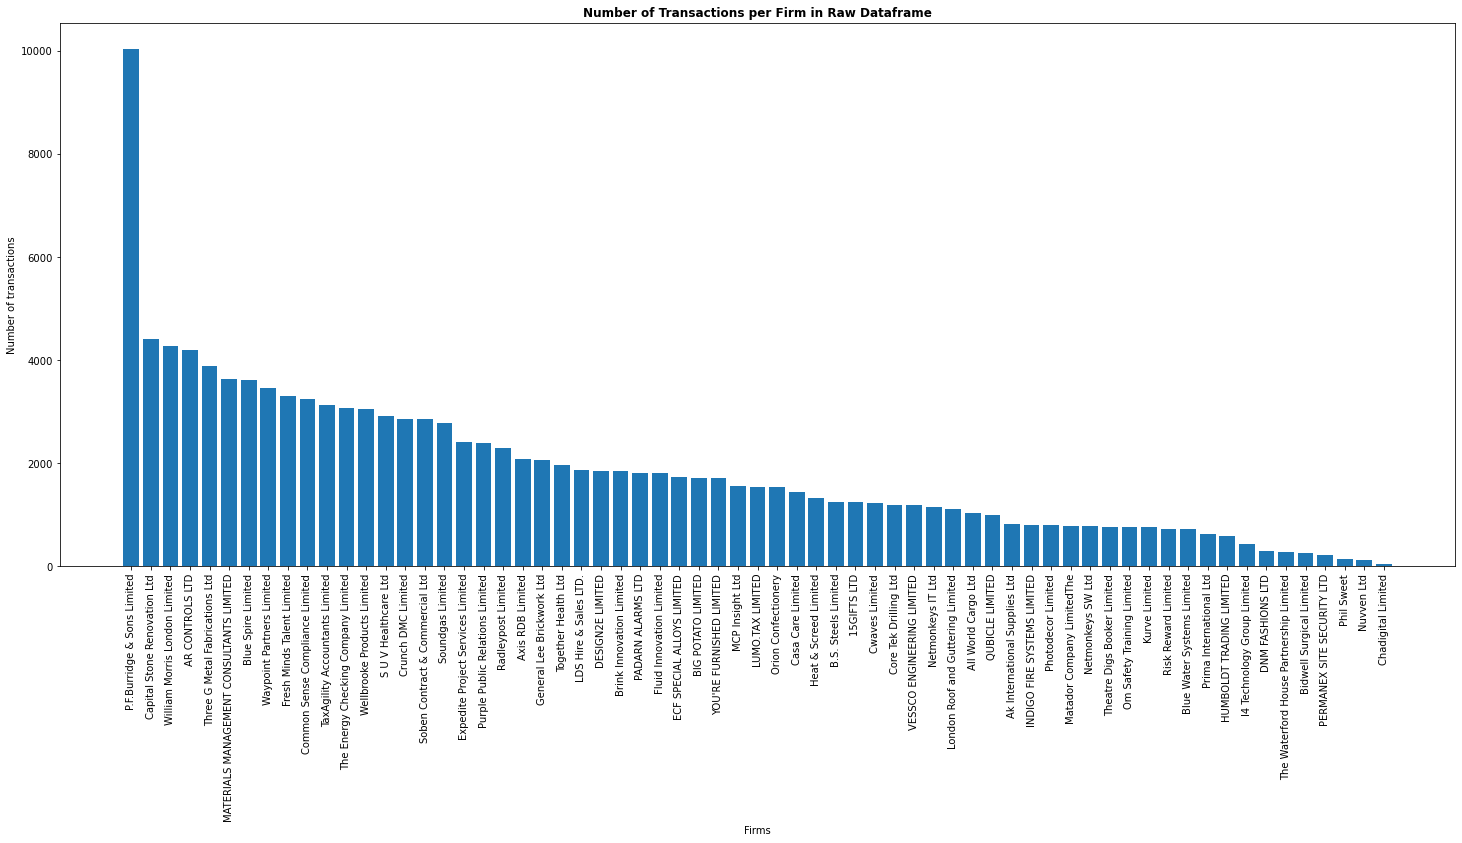

In [14]:
#number of transactions per firm
data['name'].value_counts()
#plot the graph
a = pd.DataFrame(data['name'].value_counts())
plt.figure(figsize=(25,10))
plt.bar(range(1,66),a['name'] )
plt.xticks(range(1,66), a.index,rotation=90)
plt.ylabel("Number of transactions")
plt.xlabel("Firms")
plt.title("Number of Transactions per Firm in Raw Dataframe",fontweight='bold')
plt.savefig(r'Number of Transactions per Firm.png',bbox_inches='tight')

In [35]:
#Distribution of transaction types in raw data
data['transactiontype'].value_counts()

Unknown        31828
Payment        22756
Credit         19802
Xfer           18767
Debit          13727
DirectDebit    12091
Other            552
Check            513
SerChg           362
Atm              289
Int               68
Cash              44
Name: transactiontype, dtype: int64

## 2. Data Cleaning

### 2.1 Local Rules

In [13]:
#lowercase local rule descriptions for mapping
functions.lowercase(loc_rules,'transaction_description')

In [15]:
#create debit dummy
loc_rules = pd.get_dummies(loc_rules, columns=['accounting_entry'],drop_first=True)
loc_rules.rename(columns = {"transaction_description": "description","accounting_entry_DR": "debit_binary"},  inplace=True)

In [16]:
#drop unuseful variables
loc_rules=functions.drop_column(loc_rules,['id','updated_by','created_at','updated_at'])
loc_rules.head()

,description,crd_id,standard_transaction_type_id,created_at_date,updated_at_date,debit_binary
0,paypal payment,3f0b26fd-a097-4917-969d-0210f472be56,11,2019-10-31,2019-10-31,1
1,american express,3f0b26fd-a097-4917-969d-0210f472be56,11,2019-10-31,2019-10-31,1
2,western union 13255lc023nk,3f0b26fd-a097-4917-969d-0210f472be56,11,2019-10-31,2019-10-31,1
3,sue pettit rbh161098xqfvr9c eur rate 1.13057090000001.13057093,3f0b26fd-a097-4917-969d-0210f472be56,11,2019-10-31,2019-10-31,1
4,advice confirms rbh15109alq9xdc0 upstream mobile co,3f0b26fd-a097-4917-969d-0210f472be56,6,2019-10-31,2019-10-31,0


In [17]:
#check duplcicated of transactions with same description and accounting entry and those with different classes 
loc_rules[loc_rules.duplicated(subset=['description','debit_binary'],keep=False)].sort_values('description')

,description,crd_id,standard_transaction_type_id,created_at_date,updated_at_date,debit_binary
444,advice confirms rbs281090or7d5xc 1/cliq b.v.,3f0b26fd-a097-4917-969d-0210f472be56,6,2019-10-31,2019-10-31,0
455,advice confirms rbs281090or7d5xc 1/cliq b.v.,dc986e56-bb69-4d8b-a8bb-cb05354b7a23,6,2019-10-31,2019-10-31,0
297,advice confirms rbs28109aqr7d1c0 1/red27mobile limi,3f0b26fd-a097-4917-969d-0210f472be56,6,2019-10-31,2019-10-31,0
308,advice confirms rbs28109aqr7d1c0 1/red27mobile limi,dc986e56-bb69-4d8b-a8bb-cb05354b7a23,6,2019-10-31,2019-10-31,0
930,capital on tap,47560127-50c8-43a0-8912-1d06ffac8dc4,11,2020-02-17,2020-02-17,1
418,capital on tap,e23e00d8-5961-4695-ae9f-0454ebbbe04a,13,2020-03-11,2020-03-11,1
866,crutchfie loan transfer,1b033358-f00f-4bc0-bc2b-dd3c6f796860,3,2020-03-23,2020-03-23,0
1641,crutchfie loan transfer,1b033358-f00f-4bc0-bc2b-dd3c6f796860,1,2020-03-23,2020-03-23,0
504,ee limited,dc986e56-bb69-4d8b-a8bb-cb05354b7a23,11,2019-10-31,2019-10-31,1
493,ee limited,3f0b26fd-a097-4917-969d-0210f472be56,11,2019-10-31,2019-10-31,1


#### Conflicting Rules

In [18]:
#Unify transactions with same description and accounting entry but different classes 
functions.conflict_correct(loc_rules,['capital on tap','premium credit ltd'],['standard_transaction_type_id'],11)
functions.conflict_correct(loc_rules,['hmrc paye 39225lc01s9c'],['standard_transaction_type_id'],12)
functions.conflict_correct(loc_rules,['crutchfie loan transfer'],['standard_transaction_type_id'],2)
functions.conflict_correct(loc_rules,['james o rourke growthst-ibcnesijwfp 30/10/19 1523 000000017929908901'],['standard_transaction_type_id'],1)

In [19]:
#check duplicated transactions
loc_rules[loc_rules.duplicated(subset=['description','standard_transaction_type_id','debit_binary'],keep=False)].sort_values('description')

,description,crd_id,standard_transaction_type_id,created_at_date,updated_at_date,debit_binary
444,advice confirms rbs281090or7d5xc 1/cliq b.v.,3f0b26fd-a097-4917-969d-0210f472be56,6,2019-10-31,2019-10-31,0
455,advice confirms rbs281090or7d5xc 1/cliq b.v.,dc986e56-bb69-4d8b-a8bb-cb05354b7a23,6,2019-10-31,2019-10-31,0
297,advice confirms rbs28109aqr7d1c0 1/red27mobile limi,3f0b26fd-a097-4917-969d-0210f472be56,6,2019-10-31,2019-10-31,0
308,advice confirms rbs28109aqr7d1c0 1/red27mobile limi,dc986e56-bb69-4d8b-a8bb-cb05354b7a23,6,2019-10-31,2019-10-31,0
930,capital on tap,47560127-50c8-43a0-8912-1d06ffac8dc4,11,2020-02-17,2020-02-17,1
418,capital on tap,e23e00d8-5961-4695-ae9f-0454ebbbe04a,11,2020-03-11,2020-03-11,1
866,crutchfie loan transfer,1b033358-f00f-4bc0-bc2b-dd3c6f796860,2,2020-03-23,2020-03-23,0
1641,crutchfie loan transfer,1b033358-f00f-4bc0-bc2b-dd3c6f796860,2,2020-03-23,2020-03-23,0
504,ee limited,dc986e56-bb69-4d8b-a8bb-cb05354b7a23,11,2019-10-31,2019-10-31,1
493,ee limited,3f0b26fd-a097-4917-969d-0210f472be56,11,2019-10-31,2019-10-31,1


In [20]:
#drop duplicates 
loc_rules.drop_duplicates(['description','standard_transaction_type_id','debit_binary'],inplace = True)
loc_rules = loc_rules.reset_index(drop=True)
functions.explore(loc_rules)

The shape of the dataset is:(1717, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   description                   1717 non-null   object
 1   crd_id                        1717 non-null   object
 2   standard_transaction_type_id  1717 non-null   int64 
 3   created_at_date               1717 non-null   object
 4   updated_at_date               1717 non-null   object
 5   debit_binary                  1717 non-null   uint8 
dtypes: int64(1), object(4), uint8(1)
memory usage: 68.9+ KB


The number of null value of the dataset is:
description                     0
crd_id                          0
standard_transaction_type_id    0
created_at_date                 0
updated_at_date                 0
debit_binary                    0
dtype: int64




,description,crd_id,standard_transaction_type_id,created_at_date,updated_at_date,debit_binary
0,paypal payment,3f0b26fd-a097-4917-969d-0210f472be56,11,2019-10-31,2019-10-31,1
1,american express,3f0b26fd-a097-4917-969d-0210f472be56,11,2019-10-31,2019-10-31,1
2,western union 13255lc023nk,3f0b26fd-a097-4917-969d-0210f472be56,11,2019-10-31,2019-10-31,1
3,sue pettit rbh161098xqfvr9c eur rate 1.13057090000001.13057093,3f0b26fd-a097-4917-969d-0210f472be56,11,2019-10-31,2019-10-31,1
4,advice confirms rbh15109alq9xdc0 upstream mobile co,3f0b26fd-a097-4917-969d-0210f472be56,6,2019-10-31,2019-10-31,0


### 2.2 Global Rules

In [21]:
#drop unuseful variables in global rules
global_rule = functions.drop_column(global_rule,['created_at','updated_at','updated_by','description','regex_flags','transaction_field'])

### 2.3 Bank Transactions

In [22]:
#lowercase raw transactions for mapping
functions.lowercase(data,'description')

In [23]:
#find and drop duplicates
data[data.duplicated(keep=False)].sort_values('description')
data.drop_duplicates(inplace = True)

In [24]:
#select transactions with non-zero amount, as we could not call one a transaction if the amount is zero 
data = data[data['amount']!=0]

In [25]:
#Getting the final dataframe
#drop transactions withoutt any description
data = data[data['description'].notna()]
#create dummy variable showing the accounting entry
data['accounting_entry'] = np.sign(data['amount'])
data = pd.get_dummies(data, columns=['accounting_entry'],drop_first=False)
data.rename(columns = {"accounting_entry_-1.0": "debit_binary"},  inplace=True)
#drop unwanted variables
data=functions.drop_column(data,['accounting_entry_1.0'])
#Dealing with platform banks
data['platform_bank']=data['platform_bank'].replace(np.nan,'Unknown')
data = data.reset_index(drop=True)
functions.explore(data)

The shape of the dataset is:(117050, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117050 entries, 0 to 117049
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              117050 non-null  object 
 1   amount            117050 non-null  float64
 2   balance           117050 non-null  float64
 3   date              117050 non-null  object 
 4   transactiontype   117050 non-null  object 
 5   description       117050 non-null  object 
 6   platform_bank     117050 non-null  object 
 7   lastsync_bank     108746 non-null  object 
 8   status_bank       117050 non-null  object 
 9   business_id       117050 non-null  int64  
 10  bankaccount_name  117050 non-null  object 
 11  crd_id            117050 non-null  object 
 12  codat_id          117050 non-null  object 
 13  debit_binary      117050 non-null  uint8  
dtypes: float64(2), int64(1), object(10), uint8(1)
memory usage: 11.7+ MB


Th

,name,amount,balance,date,transactiontype,description,platform_bank,lastsync_bank,status_bank,business_id,bankaccount_name,crd_id,codat_id,debit_binary
0,15GIFTS LTD,-8.32,174882.67,2019-07-02 00:00:00,Payment,int'l 0049276096 adobe photogphy padobe.ly/bill,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a,1
1,15GIFTS LTD,1.04,175001.90,2019-07-02 00:00:00,Credit,asda groceries onlinternet,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a,0
2,15GIFTS LTD,-432.00,175000.86,2019-07-02 00:00:00,Payment,j.weeks cleaners inv.01/15gifts,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a,1
3,15GIFTS LTD,-458.52,174424.15,2019-07-02 00:00:00,Payment,int'l 0049276097 google *gsuite_15gcc@google.com,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a,1
4,15GIFTS LTD,-77.40,175432.86,2019-07-02 00:00:00,DirectDebit,peninsula business,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a,1


## 3 Rule Mapping

### 3.1 Applying local rules on bank transactions

In [26]:
df_loc=loc_rules.copy()
#drop unwanted variables in local rules
loc_rules=functions.drop_column(loc_rules,['updated_at_date','crd_id'])
#index each rules for calculation
loc_rules['local_rule_index'] = (loc_rules.index+1)
loc_rules.head()

,description,standard_transaction_type_id,created_at_date,debit_binary,local_rule_index
0,paypal payment,11,2019-10-31,1,1
1,american express,11,2019-10-31,1,2
2,western union 13255lc023nk,11,2019-10-31,1,3
3,sue pettit rbh161098xqfvr9c eur rate 1.13057090000001.13057093,11,2019-10-31,1,4
4,advice confirms rbh15109alq9xdc0 upstream mobile co,6,2019-10-31,0,5


In [27]:
#map local rules to raw transaction by decripiton and accounting entry
df = pd.merge(data,loc_rules,on=['description','debit_binary'],how = 'left')
#fill unlabelled transactions as -1 and associated rule index as 0
df['standard_transaction_type_id'].fillna(-1,inplace=True)
df['local_rule_index'].fillna(0,inplace=True)
df['standard_transaction_type_id'] = df['standard_transaction_type_id'].astype('int')
df['local_rule_index'] = df['local_rule_index'].astype('int')
functions.explore(df)

The shape of the dataset is:(117050, 17)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117050 entries, 0 to 117049
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   name                          117050 non-null  object 
 1   amount                        117050 non-null  float64
 2   balance                       117050 non-null  float64
 3   date                          117050 non-null  object 
 4   transactiontype               117050 non-null  object 
 5   description                   117050 non-null  object 
 6   platform_bank                 117050 non-null  object 
 7   lastsync_bank                 108746 non-null  object 
 8   status_bank                   117050 non-null  object 
 9   business_id                   117050 non-null  int64  
 10  bankaccount_name              117050 non-null  object 
 11  crd_id                        117050 non-null  object 
 12  c

,name,amount,balance,date,transactiontype,description,platform_bank,lastsync_bank,status_bank,business_id,bankaccount_name,crd_id,codat_id,debit_binary,standard_transaction_type_id,created_at_date,local_rule_index
0,15GIFTS LTD,-8.32,174882.67,2019-07-02 00:00:00,Payment,int'l 0049276096 adobe photogphy padobe.ly/bill,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a,1,-1,NaN,0
1,15GIFTS LTD,1.04,175001.90,2019-07-02 00:00:00,Credit,asda groceries onlinternet,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a,0,-1,NaN,0
2,15GIFTS LTD,-432.00,175000.86,2019-07-02 00:00:00,Payment,j.weeks cleaners inv.01/15gifts,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a,1,-1,NaN,0
3,15GIFTS LTD,-458.52,174424.15,2019-07-02 00:00:00,Payment,int'l 0049276097 google *gsuite_15gcc@google.com,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a,1,-1,NaN,0
4,15GIFTS LTD,-77.40,175432.86,2019-07-02 00:00:00,DirectDebit,peninsula business,HSBC,2020-04-24 12:09:32.047226,Deauthorised,4702,15GIFTS LTD,08813058-835d-4398-9698-8ea38a59bbf7,4b319385-f94c-46a5-af00-a82ab33fdd9a,1,-1,NaN,0


In [28]:
#check conflicting transactions
df[df.duplicated(subset=['name', 'amount', 'balance', 'date', 'transactiontype', 'description','platform_bank', 'lastsync_bank', 'status_bank', 'business_id',
       'bankaccount_name', 'crd_id', 'codat_id', 'debit_binary'],keep=False)]

,name,amount,balance,date,transactiontype,description,platform_bank,lastsync_bank,status_bank,business_id,bankaccount_name,crd_id,codat_id,debit_binary,standard_transaction_type_id,created_at_date,local_rule_index


### 3.2 Applying Noisy Global Rules to the dataframe

In [29]:
#split into credit and debit transaction dataframes
a = df['debit_binary']==0
df_credit = df[a]
df_debit= df[~a]

In [36]:
#generate regrex rules for each categroy 
rule_1_str= rule_gen(1)
rule_13_str=rule_gen(13)
rule_7_str=rule_gen(7)
rule_3_str=rule_gen(3)
rule_5_str=rule_gen(5)
rule_4_str=rule_gen(4)
rule_10_str=rule_gen(10)
rule_9_str=rule_gen(9)

In [38]:
#map global rules to raw transactions
functions.rule(df_credit,1,rule_1_str)
functions.rule(df_credit,3,rule_3_str)
functions.rule(df_credit,4,rule_4_str)
functions.rule(df_credit,5,rule_5_str)
functions.rule(df_debit,7,rule_7_str)
functions.rule(df_debit,9,rule_9_str)
functions.rule(df_debit,10,rule_10_str)
functions.rule(df_debit,13,rule_13_str)

In [39]:
#checking transactions with multiple global rule labels in credits
df_credit['global']=df_credit['global1']+ df_credit['global3']+df_credit['global5']
df_credit['global'].value_counts()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0    28383
1     1119
3      502
4       54
5       19
Name: global, dtype: int64

In [40]:
#checking transactions with multiple global rule labels in debits
df_debit['global']=df_debit['global13'] + df_debit['global7']
df_debit['global'].value_counts()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0     83802
13     1951
7      1216
20        4
Name: global, dtype: int64

In [41]:
#get specific transactions that have multiple global rule labels
df_debit[((df_debit['global13']==13) & (df_debit['global7']==7))&((df_debit['global13']!=0) & (df_debit['global7']!=0))]

,name,amount,balance,date,transactiontype,description,platform_bank,lastsync_bank,status_bank,business_id,...,codat_id,debit_binary,standard_transaction_type_id,created_at_date,local_rule_index,global7,global9,global10,global13,global
103487,VESSCO ENGINEERING LIMITED,-2742.34,113120.11,2019-07-08 00:00:00,Xfer,transfer via faster payment to lloyds tsb finance reference vessco engineering,Santander,2020-05-18 00:32:53.997912,Deauthorised,4822,...,fa46672b-7a06-4b80-afd6-777ff52debff,1,-1,NaN,0,7,0,0,13,20
103506,VESSCO ENGINEERING LIMITED,-3910.50,56218.97,2019-07-10 00:00:00,Xfer,transfer to castle business finance reference vessco engineering,Santander,2020-05-18 00:32:53.997912,Deauthorised,4822,...,fa46672b-7a06-4b80-afd6-777ff52debff,1,-1,NaN,0,7,0,0,13,20
103565,VESSCO ENGINEERING LIMITED,-855.10,50220.84,2019-08-02 00:00:00,Xfer,transfer to castle business finance reference vessco engineering,Santander,2020-05-18 00:32:53.997912,Deauthorised,4822,...,fa46672b-7a06-4b80-afd6-777ff52debff,1,-1,NaN,0,7,0,0,13,20
103892,VESSCO ENGINEERING LIMITED,-594.00,86521.13,2019-10-30 00:00:00,Xfer,transfer via faster payment to first financial london reference vessco engineering,Santander,2020-05-18 00:32:53.997912,Deauthorised,4822,...,fa46672b-7a06-4b80-afd6-777ff52debff,1,-1,NaN,0,7,0,0,13,20


In [42]:
#get specific transactions that have multiple global rule labels
df_credit[((df_credit['global1']==1) & (df_credit['global3']==3))&((df_credit['global1']!=0) & (df_credit['global3']!=0))]

,name,amount,balance,date,transactiontype,description,platform_bank,lastsync_bank,status_bank,business_id,...,codat_id,debit_binary,standard_transaction_type_id,created_at_date,local_rule_index,global1,global3,global4,global5,global
11712,Blue Spire Limited,200.00,-37213.51,2019-07-05 00:00:00,Credit,blue spr fin inter co transfer fp 05/07/19 1036 363985926301507001,RBS,2020-02-21 17:35:06.163283,Deauthorised,5034,...,27597427-ed91-443d-ab94-3d21759903e9,0,-1,NaN,0,1,3,0,0,4
11726,Blue Spire Limited,200.00,-37213.51,2019-07-05 00:00:00,Credit,blue spr fin inter co transfer fp 05/07/19 1036 363985926301507001,RBS,2020-02-21 17:35:06.163283,Deauthorised,5034,...,27597427-ed91-443d-ab94-3d21759903e9,0,-1,NaN,0,1,3,0,0,4
12668,Blue Spire Limited,3000.00,-25776.77,2019-08-29 00:00:00,Credit,blue spr fin inter co transfer fp 29/08/19 0903 279419813090928001,RBS,2020-02-21 17:35:06.163283,Deauthorised,5034,...,27597427-ed91-443d-ab94-3d21759903e9,0,3,2020-07-02,606,1,3,0,0,4
12670,Blue Spire Limited,3000.00,-25776.77,2019-08-29 00:00:00,Credit,blue spr fin inter co transfer fp 29/08/19 0903 279419813090928001,RBS,2020-02-21 17:35:06.163283,Deauthorised,5034,...,27597427-ed91-443d-ab94-3d21759903e9,0,3,2020-07-02,606,1,3,0,0,4
12755,Blue Spire Limited,3000.00,-28313.77,2019-09-03 00:00:00,Credit,blue spr fin inter co transfer fp 03/09/19 0931 947502521390309001,RBS,2020-02-21 17:35:06.163283,Deauthorised,5034,...,27597427-ed91-443d-ab94-3d21759903e9,0,3,2020-03-02,1013,1,3,0,0,4
12757,Blue Spire Limited,3000.00,-28313.77,2019-09-03 00:00:00,Credit,blue spr fin inter co transfer fp 03/09/19 0931 947502521390309001,RBS,2020-02-21 17:35:06.163283,Deauthorised,5034,...,27597427-ed91-443d-ab94-3d21759903e9,0,3,2020-03-02,1013,1,3,0,0,4
14511,Blue Spire Limited,86602.00,64968.19,2019-12-23 00:00:00,Credit,transfer from we rbs55ci41074485 wesleyan bank lt d chaps tfr,RBS,2020-02-21 17:35:06.163283,Deauthorised,5034,...,27597427-ed91-443d-ab94-3d21759903e9,0,1,2020-06-01,1218,1,3,0,0,4
14592,Blue Spire Limited,945.00,-38535.85,2020-01-06 00:00:00,Credit,blue spr fin inter co transfer fp 06/01/20 0914 513695004190601001,RBS,2020-02-21 17:35:06.163283,Deauthorised,5034,...,27597427-ed91-443d-ab94-3d21759903e9,0,3,2020-06-01,1602,1,3,0,0,4
14700,Blue Spire Limited,1000.00,1472.11,2020-01-30 00:00:00,Credit,blue spr fin inter co transfer fp 30/01/20 0910 615023200190031001,RBS,2020-02-21 17:35:06.163283,Deauthorised,5034,...,27597427-ed91-443d-ab94-3d21759903e9,0,3,2020-06-01,1009,1,3,0,0,4
14715,Blue Spire Limited,2000.00,-16921.03,2020-02-03 00:00:00,Credit,blue spr fin inter co transfer fp 03/02/20 0836 859274936380302001,RBS,2020-02-21 17:35:06.163283,Deauthorised,5034,...,27597427-ed91-443d-ab94-3d21759903e9,0,-1,NaN,0,1,3,0,0,4


In [43]:
#Group the descriptions of multi-label transactions by category in regular expressions
conf_cr_des_1 = functions.conf_des_gen(conflicting_trans,'standard_transaction_type_id',1)
conf_cr_des_2 = functions.conf_des_gen(conflicting_trans,'standard_transaction_type_id',2)
conf_cr_des_3 = functions.conf_des_gen(conflicting_trans,'standard_transaction_type_id',3)
conf_dr_des_11 = functions.conf_des_gen(conflicting_trans,'standard_transaction_type_id',11)
conf_dr_des_13 = functions.conf_des_gen(conflicting_trans,'standard_transaction_type_id',13)

In [44]:
#Change the category of multi-label transactions to the correct category
functions.conflict_correct(df_credit,conf_cr_des_1,['standard_transaction_type_id', 'global'],1)
functions.conflict_correct(df_credit,conf_cr_des_2,['standard_transaction_type_id', 'global'],2)
functions.conflict_correct(df_credit,conf_cr_des_3,['standard_transaction_type_id', 'global'],3)
functions.conflict_correct(df_debit,conf_dr_des_11,['standard_transaction_type_id', 'global'],11)
functions.conflict_correct(df_debit,conf_dr_des_13,['standard_transaction_type_id', 'global'],13)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## 4. Cleaned dataframe

### 4.1 Prepare cleaned bank transactions with 

In [57]:
#merge the credits and debits dataset together
df = pd.concat([df_credit,df_debit], axis = 0, join = 'outer', ignore_index = False,sort=False)
df.sort_index(inplace=True)
#remove unwanted variables
cols = ['global1','global3','global4','global5','global','global7','global9','global10','global13']
df[cols] = df[cols].replace({0:np.nan, 0:np.nan})
df = functions.drop_column(df,['global1','global3','global4','global5','global7','global9','global10','global13','transactiontype','lastsync_bank','status_bank','bankaccount_name','business_id','codat_id'])
#turn date to datetime form 
df.date = pd.to_datetime(df.date)
#fill transactions unmatched with global rules to 0
df['global'].fillna(0,inplace=True)
df['global'] = df['global'].astype('int')
#rename the creation dates of local rules
df=df.rename(columns={"created_at_date": 'local_rule_creation_date'})
functions.explore(df)

The shape of the dataset is:(117050, 12)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117050 entries, 0 to 117049
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   name                          117050 non-null  object        
 1   amount                        117050 non-null  float64       
 2   balance                       117050 non-null  float64       
 3   date                          117050 non-null  datetime64[ns]
 4   description                   117050 non-null  object        
 5   platform_bank                 117050 non-null  object        
 6   crd_id                        117050 non-null  object        
 7   debit_binary                  117050 non-null  uint8         
 8   standard_transaction_type_id  117050 non-null  int64         
 9   local_rule_creation_date      4724 non-null    object        
 10  local_rule_index              117050 

,name,amount,balance,date,description,platform_bank,crd_id,debit_binary,standard_transaction_type_id,local_rule_creation_date,local_rule_index,global
0,15GIFTS LTD,-8.32,174882.67,2019-07-02,int'l 0049276096 adobe photogphy padobe.ly/bill,HSBC,08813058-835d-4398-9698-8ea38a59bbf7,1,-1,NaN,0,0
1,15GIFTS LTD,1.04,175001.90,2019-07-02,asda groceries onlinternet,HSBC,08813058-835d-4398-9698-8ea38a59bbf7,0,-1,NaN,0,0
2,15GIFTS LTD,-432.00,175000.86,2019-07-02,j.weeks cleaners inv.01/15gifts,HSBC,08813058-835d-4398-9698-8ea38a59bbf7,1,-1,NaN,0,0
3,15GIFTS LTD,-458.52,174424.15,2019-07-02,int'l 0049276097 google *gsuite_15gcc@google.com,HSBC,08813058-835d-4398-9698-8ea38a59bbf7,1,-1,NaN,0,0
4,15GIFTS LTD,-77.40,175432.86,2019-07-02,peninsula business,HSBC,08813058-835d-4398-9698-8ea38a59bbf7,1,-1,NaN,0,0


In [58]:
#save mapped transactions to csv for future analysis
df.to_csv(r'final_df_full.csv',index = False)

### 4.1 Local & Regex Rules in the final datasets

The number unlabeled and labeled transactions from local rules:
[112275, 4775]
The number unlabeled and labeled transactions from global rules:
[112185, 4865]


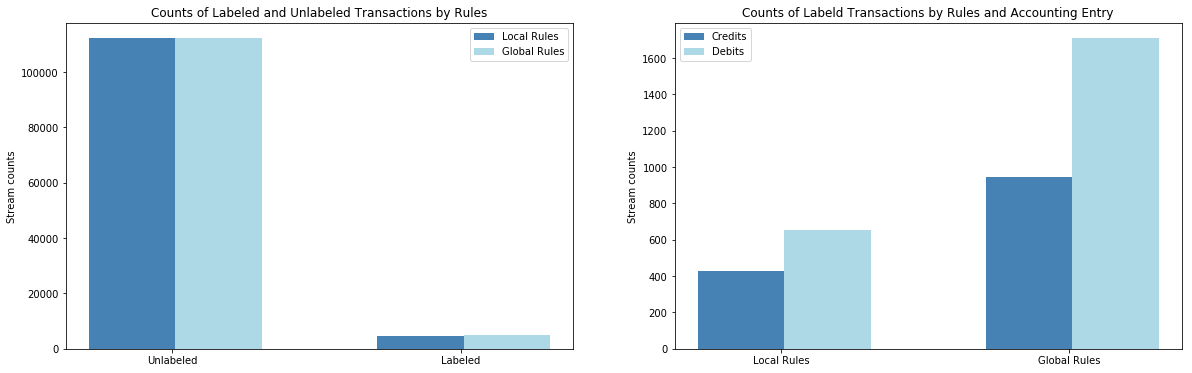

In [62]:
#Counting the number of labeled and unlabeled data from local rules
print('The number unlabeled and labeled transactions from local rules:')
l_counts = [(df["standard_transaction_type_id"]==-1).sum(), (df["standard_transaction_type_id"]>0).sum()]
g_counts = [(df["global"]==0).sum(), np.count_nonzero(df["global"])]
print(l_counts)
print('The number unlabeled and labeled transactions from global rules:')
print(g_counts)

plt.figure(figsize=(20,6))

plt.subplot(121)
barWidth = 0.3

r1 = np.arange(len(l_counts))
r2 = [x + barWidth for x in r1]

plt.bar(r1, l_counts, width=0.3, color='steelblue', align='center',label='Local Rules')
plt.bar(r2, g_counts, width=0.3, color='lightblue', align='center',label='Global Rules')

plt.xticks([0.14,1.14], ['Unlabeled', 'Labeled'])
plt.ylabel("Stream counts")
plt.title("Counts of Labeled and Unlabeled Transactions by Rules")
plt.legend()

plt.subplot(122)
y = [429,948]
z =[653,1710]
r1 = np.arange(len(y))
r2 = [x + barWidth for x in r1]

plt.bar(r1, y, width=0.3, color='steelblue', align='center',label='Credits')
plt.bar(r2, z, width=0.3, color='lightblue', align='center',label='Debits')

plt.xticks([0.14,1.14], ['Local Rules', 'Global Rules'])
plt.ylabel("Stream counts")
plt.title("Counts of Labeld Transactions by Rules and Accounting Entry")
plt.legend()
plt.show()

The number of labels gerenerated by local rules by category:
1      551
2       39
3      976
4       30
5       68
6      235
7      347
8      165
9       41
10     328
11    1072
12      62
13     788
14      47
15       8
16      18
Name: standard_transaction_type_id, dtype: int64
The number of labels gerenerated by global rules by category:
1     1137
2        1
3      537
5       19
7     1216
11      32
13    1923
Name: global, dtype: int64
[23.371017471736895, 0.020554984583761562, 11.038026721479959, 0.39054470709146966, 24.994861253854058, 0.65775950668037, 39.527235354573484]


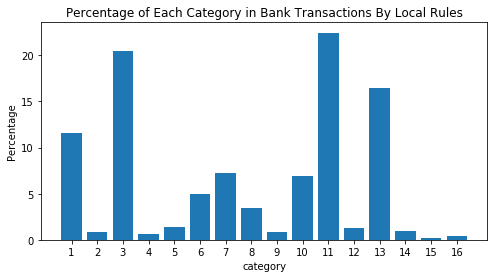

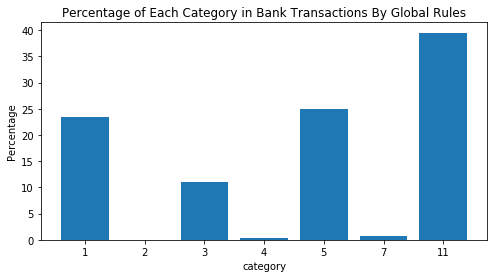

In [64]:
print('The number of labels gerenerated by local rules by category:')
print(df['standard_transaction_type_id'].value_counts().sort_index()[1:])
a1 = df['standard_transaction_type_id'].value_counts().sort_index()[1:]
X = [(x/(len(df[df['standard_transaction_type_id']!=-1])))*100 for x in a1 ]

plt.figure(figsize=(8,4))

plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], X)
plt.xticks(range(1,17), list(range(1,17)))
plt.ylabel("Percentage")
plt.xlabel("category")
plt.title("Percentage of Each Category in Bank Transactions By Local Rules")
plt.savefig(r'Per cate By Local Rules.png')

print('The number of labels gerenerated by global rules by category:')
print(df['global'].value_counts().sort_index()[1:])
a1 = df['global'].value_counts().sort_index()[1:]
X = [(x/(len(df[df['global']!=0]))*100) for x in a1 ]
print(X)
plt.figure(figsize=(8,4))
plt.xlabel("category")
plt.ylabel("Percentage")
plt.bar( range(1,8), X)
plt.xticks(range(1,8), [1,2,3,4,5,7,11,13])
plt.title("Percentage of Each Category in Bank Transactions By Global Rules")
plt.savefig(r'Per cate By global Rules.png',bbox_inches='tight')

The number of local rules that were being used in the transactions:
1158
211     444
29      284
443     261
953     150
741     136
       ... 
159       1
95        1
1717      1
1694      1
96        1
Name: local_rule_index, Length: 1158, dtype: int64


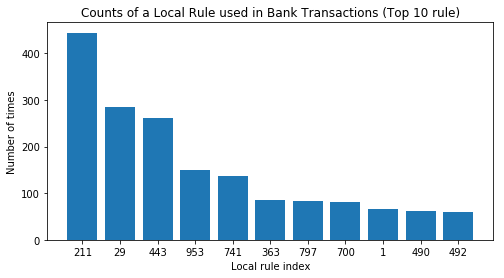

In [66]:
print('The number of local rules that were being used in the transactions:')
print(df['local_rule_index'].nunique()-1)
print(df['local_rule_index'].value_counts(ascending=False)[1:])

a1 = df['local_rule_index'].value_counts(ascending=False)[1:]
X = [(x/(df['local_rule_index'].notnull().sum())) for x in a1]
plt.figure(figsize=(8,4))
plt.bar(range(1,12), a1[:11])
plt.xticks(range(1,12), [211,29,443,953,741,363,797,700,1,490,492])
plt.ylabel("Number of times")
plt.xlabel("Local rule index")
plt.title("Counts of a Local Rule used in Bank Transactions (Top 10 rule)")
plt.savefig(r'Counts of a Local Rule.png',bbox_inches='tight')

In [68]:
df['local_rule_index'].nunique()

1159

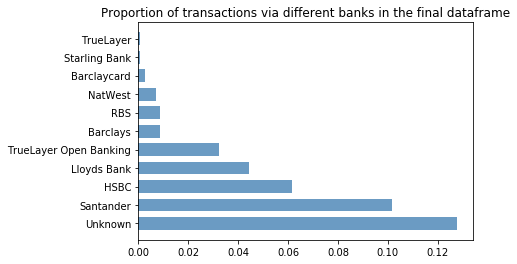

In [69]:
counts = [990,789, 478, 346, 251, 69,68,55,21,5,5]
plt.barh(range(11), [x/len(df_final)for x in counts], height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(11), ['Unknown','Santander', 'HSBC','Lloyds Bank','TrueLayer Open Banking','Barclays','RBS', 'NatWest',
                       'Barclaycard','Starling Bank', 'TrueLayer'])
plt.title("Proportion of transactions via different banks in the final dataframe")
plt.rcParams["figure.figsize"] = (7,4)
plt.show()